In [1]:
# k√ºt√ºphane importlarƒ±

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [2]:
# Veri analizi

df = pd.read_csv('../input/amazon-fine-food-reviews/Reviews.csv')
def check_df(df, head=5):
    print("### Shape ###"); print(df.shape)
    print("\n### Types ###"); print(df.dtypes)
    print(f"\n### Head ({head}) ###"); print(df.head(head))
    print(f"\n### Tail ({head}) ###"); print(df.tail(head))
    print("\n### Missing Values ###"); print(df.isnull().sum())
    print(f"\nAny Missing? {df.isnull().any().any()}")
    print(f"\nDuplicate Rows: {df.duplicated().sum()}")
    
check_df(df)

### Shape ###
(568454, 10)

### Types ###
Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

### Head (5) ###
   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0            

In [3]:
df = df.head(500)
print(df.shape)

(500, 10)


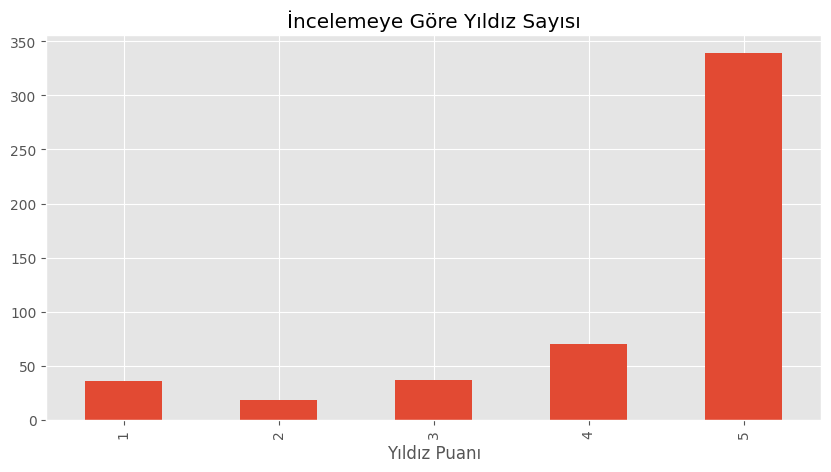

In [4]:
# ƒ∞ncelemeye G√∂re Yƒ±ldƒ±z Sayƒ±sƒ± G√∂rselle≈ütirme

ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='ƒ∞ncelemeye G√∂re Yƒ±ldƒ±z Sayƒ±sƒ±',
          figsize=(10, 5))
ax.set_xlabel('Yƒ±ldƒ±z Puanƒ±')
plt.show()

In [5]:
# dataFrame'den metin √∂rneƒüi g√∂r√ºnt√ºleme

example = df["Text"][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [6]:
# metni NLTK ile kelime token'larƒ±na ayƒ±rma

tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [7]:
# NLTK ile kelimelere Part-of-Speech (POS) etiketleme

nltk.download('averaged_perceptron_tagger_eng')
tagged = nltk.pos_tag(tokens)
tagged[:10]

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [8]:
# NLTK ile metindeki varlƒ±k isimlerini tanƒ±ma

nltk.download('maxent_ne_chunker_tab')
nltk.download('words')
entities = nltk.ne_chunk(tagged)
entities.pprint()

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to /usr/share/nltk_data...
[nltk_data]   Package words is already up-to-date!


(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


# VADER
* Bu yakla≈üƒ±m, c√ºmledeki t√ºm kelimeleri dikkate alƒ±r. Her kelimeye pozitif, n√∂tr veya negatif bir deƒüer atar. Daha sonra bu deƒüerleri birle≈ütirerek bir denklem olu≈üturur ve ifadenin genel olarak pozitif, negatif ya da n√∂tr olduƒüunu belirler.

* Bu yakla≈üƒ±m doƒüal dilde √ßok √∂nemli olan kelimeler arasƒ±ndaki ili≈ükileri hesaba katmaz.

In [9]:
# NLTK VADER ile duygu analizi ba≈ülatma

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [10]:
sia.polarity_scores("I hate you")

{'neg': 0.787, 'neu': 0.213, 'pos': 0.0, 'compound': -0.5719}

In [11]:
sia.polarity_scores("I love u darling. U are so amazing!")

{'neg': 0.0, 'neu': 0.139, 'pos': 0.861, 'compound': 0.9244}

In [12]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [13]:
# t√ºm dataFrame √ºzerinde duygu analizi uygulama

results = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    results[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [14]:
# duygu analizi sonu√ßlarƒ±nƒ± DataFrame'e d√∂n√º≈üt√ºrme ve birle≈ütirme

vaders = pd.DataFrame(results).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [15]:
vaders.head()

Id    neg    neu    pos  compound   ProductId          UserId  \
0   1  0.000  0.695  0.305    0.9441  B001E4KFG0  A3SGXH7AUHU8GW   
1   2  0.138  0.862  0.000   -0.5664  B00813GRG4  A1D87F6ZCVE5NK   
2   3  0.091  0.754  0.155    0.8265  B000LQOCH0   ABXLMWJIXXAIN   
3   4  0.000  1.000  0.000    0.0000  B000UA0QIQ  A395BORC6FGVXV   
4   5  0.000  0.552  0.448    0.9468  B006K2ZZ7K  A1UQRSCLF8GW1T   

                       ProfileName  HelpfulnessNumerator  \
0                       delmartian                     1   
1                           dll pa                     0   
2  Natalia Corres "Natalia Corres"                     1   
3                             Karl                     3   
4    Michael D. Bigham "M. Wassir"                     0   

   HelpfulnessDenominator  Score        Time                Summary  \
0                       1      5  1303862400  Good Quality Dog Food   
1                       0      1  1346976000      Not as Advertised   
2                       1      4  1219017600  "Delight" says it all   
3                       3      2  1307923200         Cough Medicine   
4                       0      5  1350777600            Great taffy   

                                                Text  
0  I have bought several of the Vitality canned d...  
1  Product arrived labeled as Jumbo Salted Peanut...  
2  This is a confection that has been around a fe...  
3  If you are looking for the secret ingredient i...  
4  Great taffy at a great price.  There was a wid...

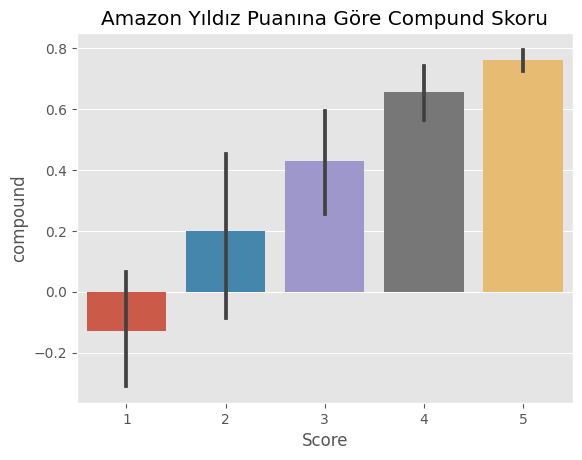

In [16]:
# Amazon Yƒ±ldƒ±z Puanƒ±na G√∂re Compund Skoru G√∂rselle≈ütirmesi

ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Amazon Yƒ±ldƒ±z Puanƒ±na G√∂re Compund Skoru')
plt.show()

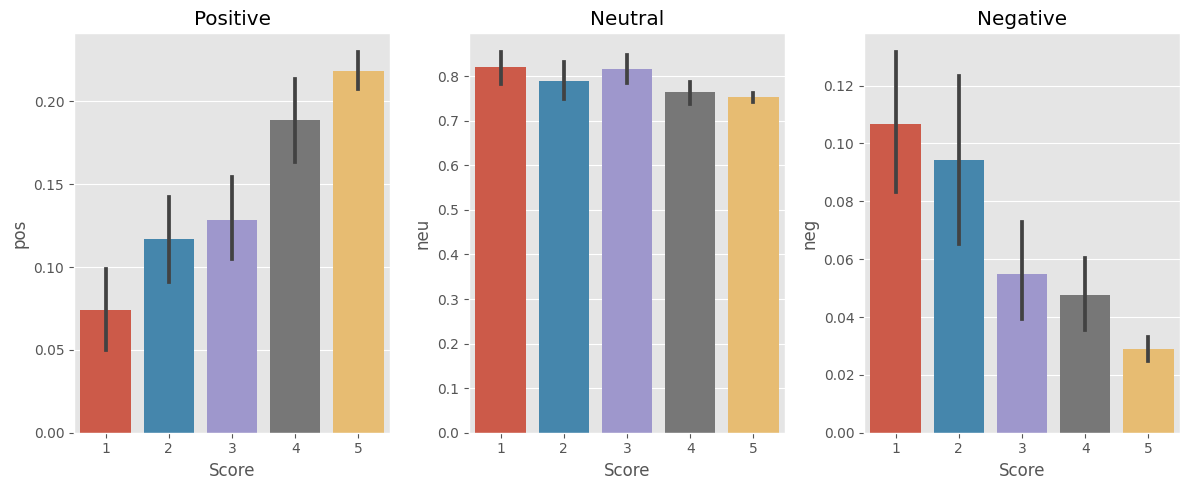

In [17]:
# duygu skorlarƒ±nƒ±n puanlara g√∂re daƒüƒ±lƒ±mƒ±nƒ± g√∂rselle≈ütirme

fig, axs = plt.subplots(1, 3, figsize=(12, 5))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [18]:
# Import i≈ülemleri

from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [19]:
# model tanƒ±mlama

MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

2025-09-29 08:43:17.875893: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759135397.918313     127 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759135397.926821     127 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [20]:
# RoBERTa modeli ile duygu analizi ve Softmax skorlarƒ± hesaplama

encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687463, 'roberta_pos': 0.0029573694}


In [21]:
# RoBERTa modeli i√ßin duygu skoru hesaplama fonksiyonu

def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [22]:
# VADER ve RoBERTa duygu analizi sonu√ßlarƒ±nƒ± birle≈ütirme

res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187


In [27]:
# duygu analizi sonu√ßlarƒ±nƒ± DataFrame'e d√∂n√º≈üt√ºrme ve ana veri ile birle≈ütirme

results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [30]:
results_df.head()

Id  vader_neg  vader_neu  vader_pos  vader_compound  roberta_neg  \
0   1      0.000      0.695      0.305          0.9441     0.009624   
1   2      0.138      0.862      0.000         -0.5664     0.508986   
2   3      0.091      0.754      0.155          0.8265     0.003229   
3   4      0.000      1.000      0.000          0.0000     0.002295   
4   5      0.000      0.552      0.448          0.9468     0.001635   

   roberta_neu  roberta_pos   ProductId          UserId  \
0     0.049980     0.940395  B001E4KFG0  A3SGXH7AUHU8GW   
1     0.452414     0.038600  B00813GRG4  A1D87F6ZCVE5NK   
2     0.098067     0.898704  B000LQOCH0   ABXLMWJIXXAIN   
3     0.090219     0.907486  B000UA0QIQ  A395BORC6FGVXV   
4     0.010302     0.988063  B006K2ZZ7K  A1UQRSCLF8GW1T   

                       ProfileName  HelpfulnessNumerator  \
0                       delmartian                     1   
1                           dll pa                     0   
2  Natalia Corres "Natalia Corres"                     1   
3                             Karl                     3   
4    Michael D. Bigham "M. Wassir"                     0   

   HelpfulnessDenominator  Score        Time                Summary  \
0                       1      5  1303862400  Good Quality Dog Food   
1                       0      1  1346976000      Not as Advertised   
2                       1      4  1219017600  "Delight" says it all   
3                       3      2  1307923200         Cough Medicine   
4                       0      5  1350777600            Great taffy   

                                                Text  
0  I have bought several of the Vitality canned d...  
1  Product arrived labeled as Jumbo Salted Peanut...  
2  This is a confection that has been around a fe...  
3  If you are looking for the secret ingredient i...  
4  Great taffy at a great price.  There was a wid...

In [29]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

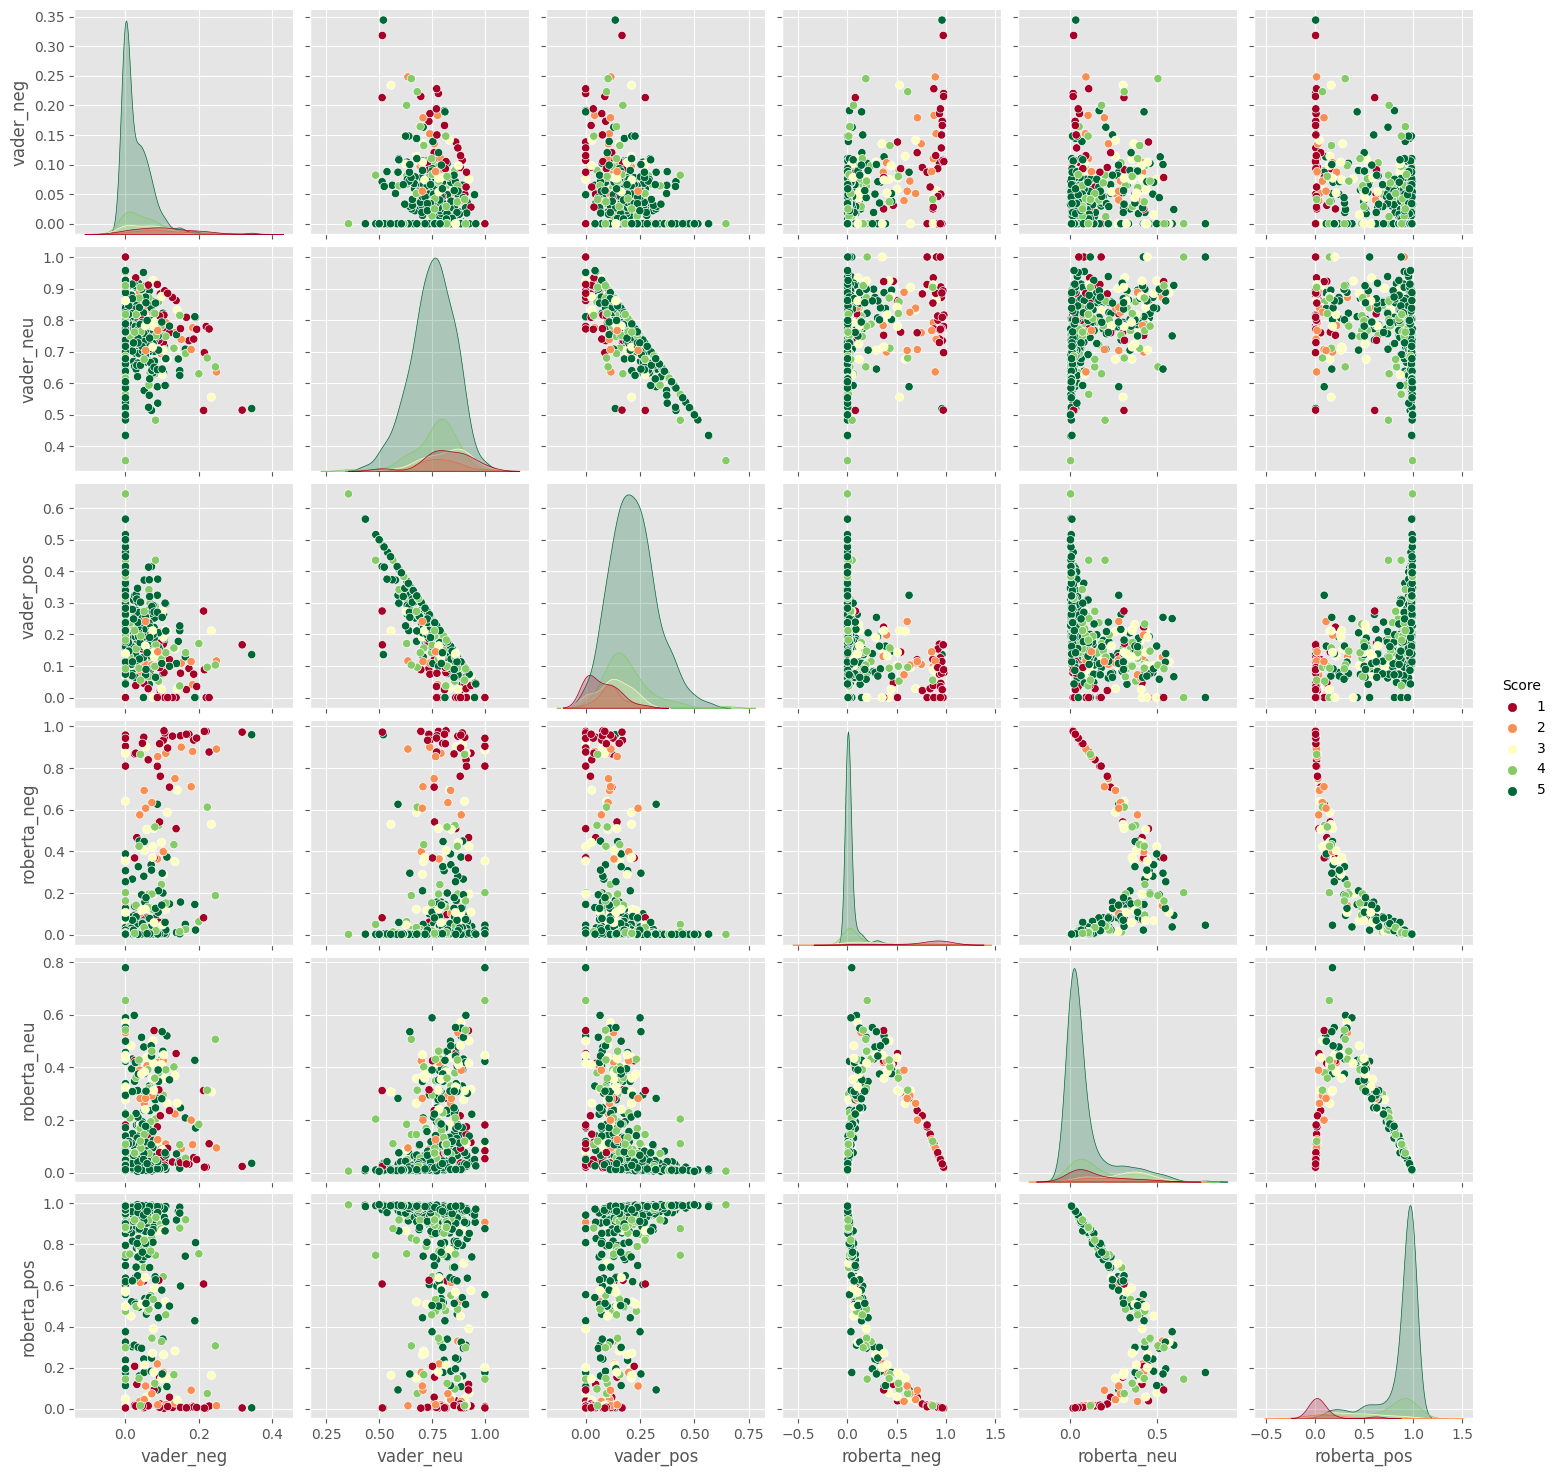

In [31]:
# VADER ve RoBERTa duygu skorlarƒ±nƒ±n √ßiftli daƒüƒ±lƒ±m analizi

sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='RdYlGn')
plt.show()

In [32]:
# en olumlu RoBERTa skoruna sahip 1 puanlƒ± yorumu bulma

results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [33]:
# en olumlu VADER skoruna sahip 1 puanlƒ± yorumu bulma

results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [34]:
# # en olumlu Roberta skoruna sahip 5 puanlƒ± yorumu bulma

results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [35]:
# # en olumsuz VADER skoruna sahip 5 puanlƒ± yorumu bulma

results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [39]:
# hugging face transformers ile hazƒ±r duygu analizi pipeline'ƒ± Olu≈üturma

from transformers import pipeline
sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


In [40]:
sent_pipeline("I love music. Music is the best thing")

[{'label': 'POSITIVE', 'score': 0.999840259552002}]

In [41]:
sent_pipeline("Sorry but we can't be friends anymore.We should'nt talk!")

[{'label': 'NEGATIVE', 'score': 0.9984462857246399}]

sent_pipeline("yeeaahh")

# Ekstra √áalƒ±≈ümalar

In [1]:
# Import i≈ülemleri

# Temel k√ºt√ºphaneler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Metin i≈üleme k√ºt√ºphaneleri
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

# G√∂rselle≈ütirme i√ßin
from wordcloud import WordCloud, STOPWORDS

# NLP & Topic Modeling
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# ƒ∞statistiksel analiz
from collections import Counter
from scipy.stats import ttest_ind


In [2]:
df = pd.read_csv('../input/amazon-fine-food-reviews/Reviews.csv')

In [3]:
# unix timestamp s√ºtununu tarih formatƒ±na d√∂n√º≈üt√ºrme

df['date'] = pd.to_datetime(df['Time'], unit='s')


In [4]:
# √ºr√ºnlere g√∂re yorum sayƒ±larƒ±nƒ± hesaplama ve sƒ±ralama

product_counts = df.groupby('ProductId').size().rename('review_count')
product_counts = product_counts.sort_values(ascending=False)

In [5]:
# en √ßok yorum alan ilk 10 √ºr√ºn√º listeleme

N = 10
top_products = product_counts.head(N).reset_index().rename(columns={0: 'ProductId'})
top_products = top_products.rename(columns={'index':'ProductId'}) if 'index' in top_products.columns else top_products
print("Top", N, "√ºr√ºn (ProductId, review_count):")
print(top_products)

Top 10 √ºr√ºn (ProductId, review_count):
    ProductId  review_count
0  B007JFMH8M           913
1  B0026RQTGE           632
2  B002QWHJOU           632
3  B002QWP89S           632
4  B002QWP8H0           632
5  B003B3OOPA           623
6  B001EO5Q64           567
7  B0026KPDG8           564
8  B000VK8AVK           564
9  B006HYLW32           564


In [6]:
# √ºr√ºn bazlƒ± istatistiksel analiz ve yararlƒ±lƒ±k oranƒ± hesaplama

prod_stats = df.groupby('ProductId').agg(
    review_count=('Id', 'count'),
    avg_score=('Score', 'mean'),
    help_num=('HelpfulnessNumerator', 'sum'),
    help_den=('HelpfulnessDenominator', 'sum')
).sort_values('review_count', ascending=False)

# Hesap: helpfulness oranƒ± (denominator 0 ise NaN)
prod_stats['helpfulness_rate'] = np.where(prod_stats['help_den'] > 0,
                                         prod_stats['help_num'] / prod_stats['help_den'],
                                         np.nan)

top_products_stats = prod_stats.head(N).reset_index()
print(top_products_stats)


top_products_stats.to_csv('top_products_stats.csv', index=False)


    ProductId  review_count  avg_score  help_num  help_den  helpfulness_rate
0  B007JFMH8M           913   4.582694        41        46          0.891304
1  B0026RQTGE           632   4.588608       611       887          0.688839
2  B002QWHJOU           632   4.588608       611       887          0.688839
3  B002QWP89S           632   4.588608       611       887          0.688839
4  B002QWP8H0           632   4.588608       611       887          0.688839
5  B003B3OOPA           623   4.739968      2944      3415          0.862079
6  B001EO5Q64           567   4.746032      1947      2340          0.832051
7  B0026KPDG8           564   4.310284       488       705          0.692199
8  B000VK8AVK           564   4.310284       488       705          0.692199
9  B006HYLW32           564   4.310284       488       705          0.692199


In [7]:
# kullanƒ±cƒ± bazlƒ± istatistiksel analiz ve yararlƒ±lƒ±k oranƒ± hesaplama

user_stats_by_userid = df.groupby('UserId').agg(
    review_count=('Id', 'count'),
    avg_score=('Score', 'mean'),
    help_num=('HelpfulnessNumerator', 'sum'),
    help_den=('HelpfulnessDenominator', 'sum')
).sort_values('review_count', ascending=False)

user_stats_by_userid['helpfulness_rate'] = np.where(user_stats_by_userid['help_den'] > 0,
                                                   user_stats_by_userid['help_num'] / user_stats_by_userid['help_den'],
                                                   np.nan)

In [8]:
# en aktif ilk 10 kullanƒ±cƒ±yƒ± listeleme

M = 10
top_users_userid = user_stats_by_userid.head(M).reset_index()
print("Top", M, "kullanƒ±cƒ± (UserId bazlƒ±):")
print(top_users_userid)

Top 10 kullanƒ±cƒ± (UserId bazlƒ±):
           UserId  review_count  avg_score  help_num  help_den  \
0  A3OXHLG6DIBRW8           448   4.535714      1344      1372   
1  A1YUL9PCJR3JTY           421   4.494062      1285      1380   
2   AY12DBB0U420B           389   4.647815       490       535   
3  A281NPSIMI1C2R           365   4.841096      1282      1458   
4  A1Z54EM24Y40LL           256   4.453125       385       432   
5  A1TMAVN4CEM8U8           204   4.833333       129       178   
6  A2MUGFV2TDQ47K           201   3.751244       251       310   
7  A3TVZM3ZIXG8YW           199   1.000000      2101      3084   
8  A3PJZ8TU8FDQ1K           178   4.601124       704       789   
9   AQQLWCMRNDFGI           176   3.954545       334       373   

   helpfulness_rate  
0          0.979592  
1          0.931159  
2          0.915888  
3          0.879287  
4          0.891204  
5          0.724719  
6          0.809677  
7          0.681258  
8          0.892269  
9          0.8954

In [9]:
# profil isimlerine g√∂re kullanƒ±cƒ± istatistikleri ve en aktif kullanƒ±cƒ±lar

user_stats_by_name = df.groupby('ProfileName').agg(
    review_count=('Id', 'count'),
    avg_score=('Score', 'mean'),
    help_num=('HelpfulnessNumerator', 'sum'),
    help_den=('HelpfulnessDenominator', 'sum')
).sort_values('review_count', ascending=False)

user_stats_by_name['helpfulness_rate'] = np.where(user_stats_by_name['help_den'] > 0,
                                                  user_stats_by_name['help_num'] / user_stats_by_name['help_den'],
                                                  np.nan)

top_users_name = user_stats_by_name.head(M).reset_index()
print("Top", M, "kullanƒ±cƒ± (Profil Name bazlƒ±):")
print(top_users_name)


Top 10 kullanƒ±cƒ± (Profil Name bazlƒ±):
                              ProfileName  review_count  avg_score  help_num  \
0                        C. F. Hill "CFH"           451   4.532151      1344   
1         O. Brown "Ms. O. Khannah-Brown"           421   4.494062      1285   
2                           Gary Peterson           389   4.647815       490   
3  Rebecca of Amazon "The Rebecca Review"           365   4.841096      1282   
4                                   Chris           363   4.179063       613   
5                                   Linda           290   4.017241       274   
6                                    John           261   4.222222       501   
7                                    Mike           260   3.907692       227   
8                                      c2           256   4.453125       385   
9                                   Laura           253   4.185771       348   

   help_den  helpfulness_rate  
0      1372          0.979592  
1      1380   

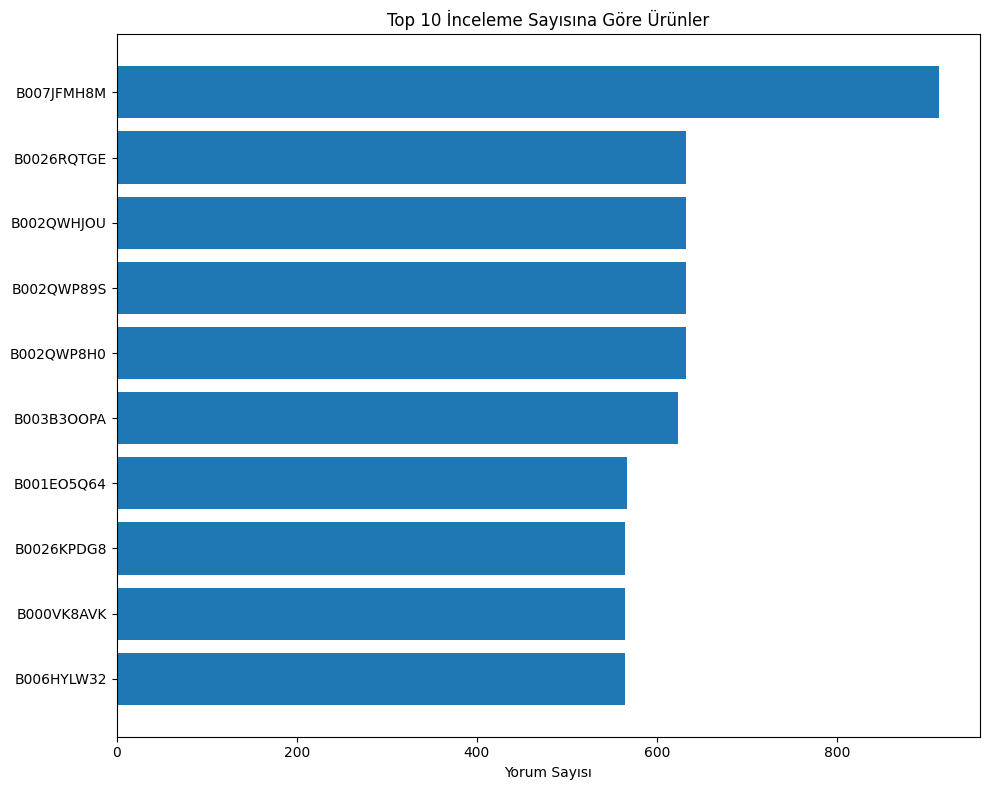

In [10]:
# ƒ∞nceleme Sayƒ±sƒ±na G√∂re √úr√ºnler G√∂rselle≈ütirmesi

plt.figure(figsize=(10, 8))
top = prod_stats.head(N)
plt.barh(top.index[::-1], top['review_count'][::-1])   # ters √ßevirme: en √ßok solda √ºstte
plt.xlabel('Yorum Sayƒ±sƒ±')
plt.title(f'Top {N} ƒ∞nceleme Sayƒ±sƒ±na G√∂re √úr√ºnler')
plt.tight_layout()
plt.show()

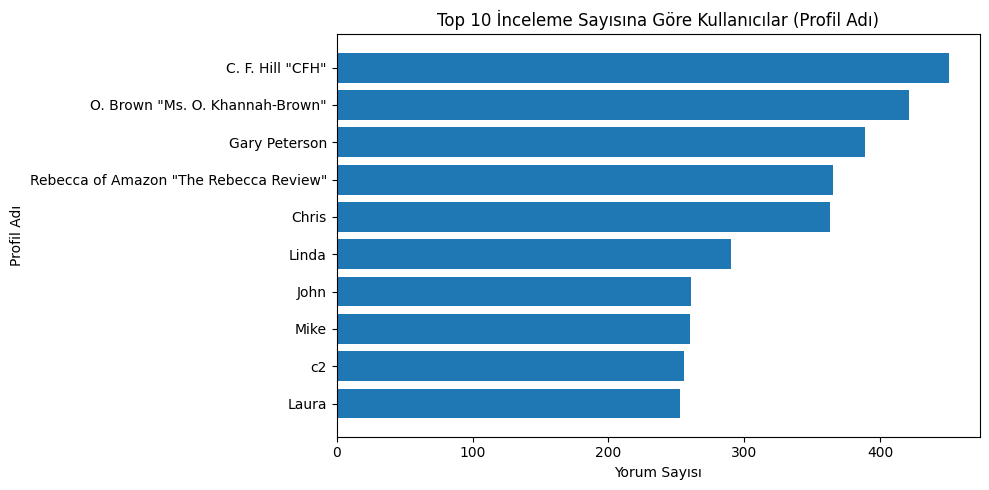

In [11]:
# profile name bazƒ±nda top 10 kullanƒ±cƒ± g√∂rselle≈ütirmesi
M = 10
top_u_name = user_stats_by_name.head(M).reset_index()

plt.figure(figsize=(10, 5))
plt.barh(top_u_name['ProfileName'][::-1], top_u_name['review_count'][::-1])
plt.xlabel('Yorum Sayƒ±sƒ±')
plt.ylabel('Profil Adƒ±')
plt.title(f'Top {M} ƒ∞nceleme Sayƒ±sƒ±na G√∂re Kullanƒ±cƒ±lar (Profil Adƒ±)')
plt.tight_layout()
plt.show()


In [12]:
# √ºr√ºn yorum daƒüƒ±lƒ±mƒ±nƒ± analiz etme ve k√ºm√ºlatif y√ºzde hesaplama

prod_counts_df = product_counts.reset_index().rename(columns={0: 'ProductId', 'ProductId': 'ProductId', 'index':'ProductId'}).rename(columns={0:'review_count'})
prod_counts_df.columns = ['ProductId', 'review_count']
prod_counts_df = prod_counts_df.sort_values('review_count', ascending=False).reset_index(drop=True)
prod_counts_df['cum_reviews'] = prod_counts_df['review_count'].cumsum()
prod_counts_df['cum_pct'] = 100 * prod_counts_df['cum_reviews'] / prod_counts_df['review_count'].sum()


print("Top 10 √ºr√ºn toplam yorum i√ßindeki payƒ± (y√ºzde):", prod_counts_df.loc[:9,'cum_pct'].iloc[-1])

Top 10 √ºr√ºn toplam yorum i√ßindeki payƒ± (y√ºzde): 1.1123151565474074


In [13]:
# yararlƒ±lƒ±k oranƒ± ve yorum uzunluƒüu √∂zellikleri ekleme

df['helpfulness_ratio'] = np.where(df['HelpfulnessDenominator'] > 0,
                                   df['HelpfulnessNumerator'] / df['HelpfulnessDenominator'],
                                   np.nan)

# Yorum uzunluƒüu (kelime sayƒ±sƒ±)
df['word_count'] = df['Text'].apply(lambda x: len(str(x).split()))

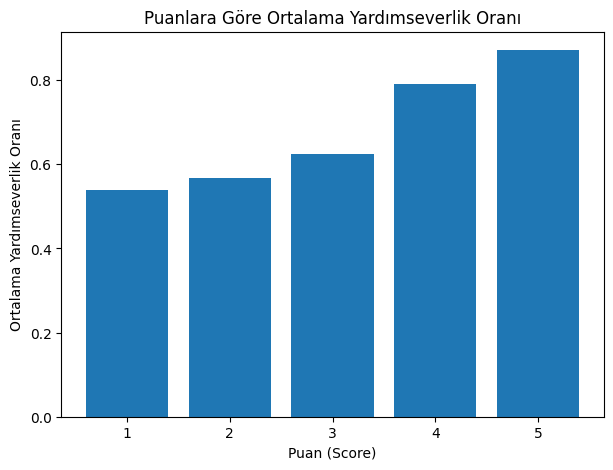

In [14]:
# puanlara g√∂re ortalama yardƒ±mseverlik oranƒ± g√∂rselle≈ütirmesi

score_helpfulness = df.groupby('Score')['helpfulness_ratio'].mean().reset_index()

plt.figure(figsize=(7,5))
plt.bar(score_helpfulness['Score'], score_helpfulness['helpfulness_ratio'])
plt.xlabel('Puan (Score)')
plt.ylabel('Ortalama Yardƒ±mseverlik Oranƒ±')
plt.title('Puanlara G√∂re Ortalama Yardƒ±mseverlik Oranƒ±')
plt.show()

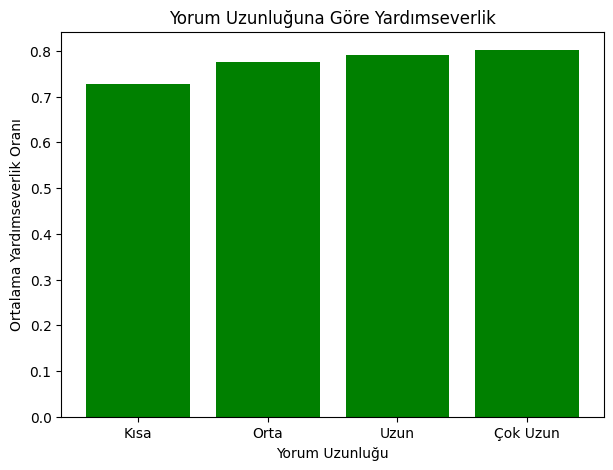

In [18]:
# yorum uzunluƒüuna g√∂re yardƒ±mseverlik g√∂rselle≈ütirmesi

df['length_category'] = pd.qcut(df['word_count'], q=4, labels=['Kƒ±sa', 'Orta', 'Uzun', '√áok Uzun'])

length_helpfulness = df.groupby('length_category')['helpfulness_ratio'].mean().reset_index()

plt.figure(figsize=(7,5))
plt.bar(length_helpfulness['length_category'], length_helpfulness['helpfulness_ratio'], color='green')
plt.xlabel('Yorum Uzunluƒüu')
plt.ylabel('Ortalama Yardƒ±mseverlik Oranƒ±')
plt.title('Yorum Uzunluƒüuna G√∂re Yardƒ±mseverlik')
plt.show()

In [19]:
# metin temizleme ve √∂n i≈üleme fonksiyonu

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)  # noktalama vs.
    words = [lemmatizer.lemmatize(w) for w in text.split() if w not in stop_words]
    return ' '.join(words)

df['clean_text'] = df['Text'].apply(clean_text)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [99]:
## Topic Modelleme

custom_stopwords = list(text.ENGLISH_STOP_WORDS) + ['br']
vectorizer = CountVectorizer(max_df = 0.9, min_df = 50, stop_words = "english")
X = vectorizer.fit_transform(df['clean_text'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

terms = vectorizer.get_feature_names_out()

for i, topic in enumerate(lda.components_):
    top_terms = [terms[j] for j in topic.argsort()[:-11:-1]]
    print(f"üß© Topic {i+1}: {', '.join(top_terms)}")

üß© Topic 1: tea, br, taste, like, flavor, drink, sugar, water, good, product
üß© Topic 2: coffee, br, like, cup, product, good, taste, flavor, box, great
üß© Topic 3: great, good, love, chocolate, like, taste, flavor, store, amazon, price
üß© Topic 4: food, dog, cat, treat, love, br, like, product, day, eat
üß© Topic 5: br, like, taste, good, make, product, great, use, food, flavor


In [21]:
# anahtar kelimelere g√∂re yorum puanlarƒ±nƒ± analiz etme

keywords = ['taste', 'delivery', 'packaging', 'fresh', 'expired']

for word in keywords:
    mask = df['clean_text'].str.contains(word, case=False, na=False)
    avg_score = df.loc[mask, 'Score'].mean()
    print(f"'{word}' ge√ßen yorumlarƒ±n ortalama puanƒ±: {avg_score:.2f}")


'taste' ge√ßen yorumlarƒ±n ortalama puanƒ±: 4.01
'delivery' ge√ßen yorumlarƒ±n ortalama puanƒ±: 4.46
'packaging' ge√ßen yorumlarƒ±n ortalama puanƒ±: 3.77
'fresh' ge√ßen yorumlarƒ±n ortalama puanƒ±: 4.42
'expired' ge√ßen yorumlarƒ±n ortalama puanƒ±: 2.59


‚úÖ En sƒ±k 5 yƒ±ldƒ±z kelimeleri:
        word   count
0        br  147227
1      like  143171
2      love  127533
3     great  125527
4      good  115647
5     taste  113632
6       one  112664
7    flavor  104338
8       tea   97158
9   product   96301
10   coffee   94849
11     food   93517
12      get   71888
13     make   69521
14      dog   65532
‚ùå En sƒ±k 1 yƒ±ldƒ±z kelimeleri:
        word  count
0        br  27878
1   product  26208
2      like  25782
3     taste  22178
4       one  19099
5      food  18217
6     would  16657
7    coffee  12591
8    flavor  12018
9       dog  11979
10     good  11708
11     even  11347
12     dont  10799
13      get  10334
14      buy  10211


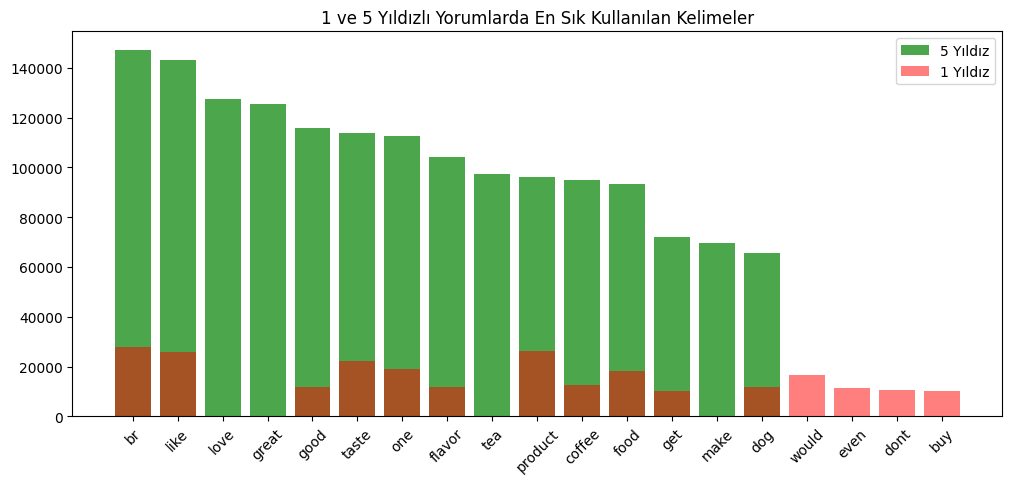

In [22]:
# puanlara g√∂re en sƒ±k kullanƒ±lan kelimeleri analiz etme ve g√∂rselle≈ütirme

def get_top_words(df_subset, n=15):
    words = ' '.join(df_subset['clean_text']).split()
    common = Counter(words).most_common(n)
    return pd.DataFrame(common, columns=['word', 'count'])

top_5 = get_top_words(df[df['Score'] == 5])
top_1 = get_top_words(df[df['Score'] == 1])

print("‚úÖ En sƒ±k 5 yƒ±ldƒ±z kelimeleri:\n", top_5)
print("‚ùå En sƒ±k 1 yƒ±ldƒ±z kelimeleri:\n", top_1)

# G√∂rselle≈ütirme
plt.figure(figsize=(12,5))
plt.bar(top_5['word'], top_5['count'], color='green', alpha=0.7, label='5 Yƒ±ldƒ±z')
plt.bar(top_1['word'], top_1['count'], color='red', alpha=0.5, label='1 Yƒ±ldƒ±z')
plt.legend()
plt.xticks(rotation=45)
plt.title('1 ve 5 Yƒ±ldƒ±zlƒ± Yorumlarda En Sƒ±k Kullanƒ±lan Kelimeler')
plt.show()


üèÜ En iyi √ºr√ºnler:
         ProductId  review_count  avg_score
8253   B000ED9L9E           113   4.973451
17287  B000O5DI1E           107   4.906542
16945  B000NMJWZO           542   4.881919
49159  B003QDRJXY           264   4.837121
47846  B003KRHDMI           132   4.833333
71762  B007R900WA           170   4.823529
28118  B001E8DHPW           389   4.802057
11212  B000GAT6NG           389   4.802057
56627  B004EAGP74           389   4.802057
8952   B000ET4SM8           176   4.801136
‚ö†Ô∏è Tartƒ±≈ümalƒ± √ºr√ºnler:
         ProductId  review_count  avg_score
69165  B006N3I69A           131   1.343511
21233  B000X1Q1G8           184   1.695652


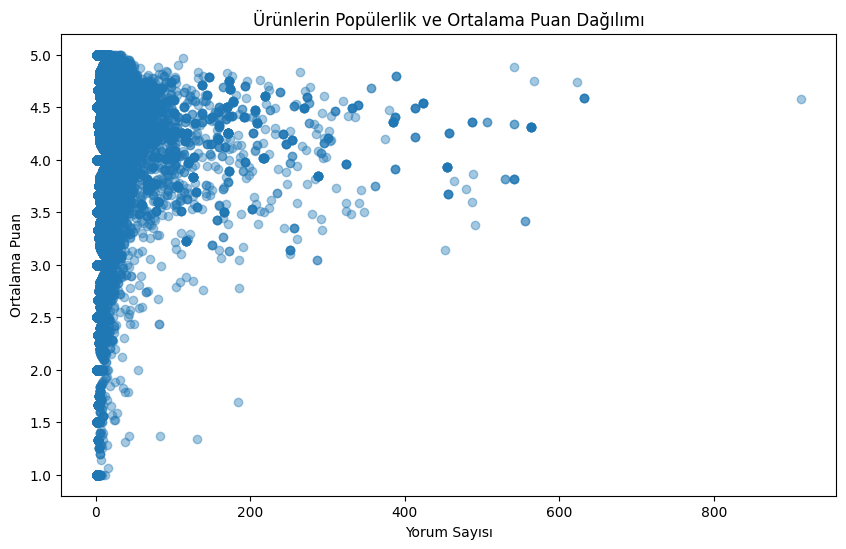

In [23]:
# √ºr√ºn performans analizi: en iyi ve tartƒ±≈ümalƒ± √ºr√ºnleri belirleme

product_summary = df.groupby('ProductId').agg(
    review_count=('Id', 'count'),
    avg_score=('Score', 'mean')
).reset_index()

# Kazananlar
winners = product_summary.query('review_count >= 100 and avg_score >= 4.5')
# Tartƒ±≈ümalƒ± √ºr√ºnler
controversial = product_summary.query('review_count >= 100 and avg_score <= 2.5')

print("üèÜ En iyi √ºr√ºnler:\n", winners.sort_values('avg_score', ascending=False).head(10))
print("‚ö†Ô∏è Tartƒ±≈ümalƒ± √ºr√ºnler:\n", controversial.sort_values('avg_score').head(10))

plt.figure(figsize=(10,6))
plt.scatter(product_summary['review_count'], product_summary['avg_score'], alpha=0.4)
plt.xlabel('Yorum Sayƒ±sƒ±')
plt.ylabel('Ortalama Puan')
plt.title('√úr√ºnlerin Pop√ºlerlik ve Ortalama Puan Daƒüƒ±lƒ±mƒ±')
plt.show()


In [24]:
# tarih s√ºtunu kontrol√º ve olu≈üturma

if 'date' not in df.columns:
    df['date'] = pd.to_datetime(df['Time'], unit='s')

In [25]:
# kullanƒ±cƒ± sadakat metrikleri hesaplama

user_review_counts = df.groupby('UserId').size().rename('review_count')
distinct_products = df.groupby('UserId')['ProductId'].nunique().rename('distinct_products')
max_per_product = (df.groupby(['UserId','ProductId']).size()
                    .groupby('UserId').max().rename('max_per_product'))

user_loyalty = pd.concat([user_review_counts, distinct_products, max_per_product], axis=1).fillna(0).reset_index()
user_loyalty['share_top_product'] = user_loyalty['max_per_product'] / user_loyalty['review_count']

In [26]:
# kullanƒ±cƒ± profil isimlerini e≈üle≈ütirme ve sadakat analizini tamamlama

user_names = (df.groupby('UserId')['ProfileName']
                .agg(lambda x: x.dropna().mode().iloc[0] if not x.dropna().mode().empty else x.dropna().iloc[0] if len(x.dropna())>0 else "")
                .to_dict())

user_loyalty['ProfileName'] = user_loyalty['UserId'].map(user_names)
user_loyalty.sort_values('review_count', ascending=False).head(20).to_csv('user_loyalty_top20.csv', index=False)
print("Top 20 kullanƒ±cƒ± (review_count, distinct_products, share_top_product):")
print(user_loyalty.sort_values('review_count', ascending=False).head(20))

Top 20 kullanƒ±cƒ± (review_count, distinct_products, share_top_product):
                UserId  review_count  distinct_products  max_per_product  \
182011  A3OXHLG6DIBRW8           448                420                2   
65586   A1YUL9PCJR3JTY           421                309                4   
252275   AY12DBB0U420B           389                382                2   
82919   A281NPSIMI1C2R           365                321                5   
66162   A1Z54EM24Y40LL           256                251                2   
55736   A1TMAVN4CEM8U8           204                 90                6   
110863  A2MUGFV2TDQ47K           201                201                1   
191283  A3TVZM3ZIXG8YW           199                 38               10   
183161  A3PJZ8TU8FDQ1K           178                118                5   
238453   AQQLWCMRNDFGI           176                167                2   
122371  A2SZLNSI5KOQJT           175                131                5   
85706   A29JUMR

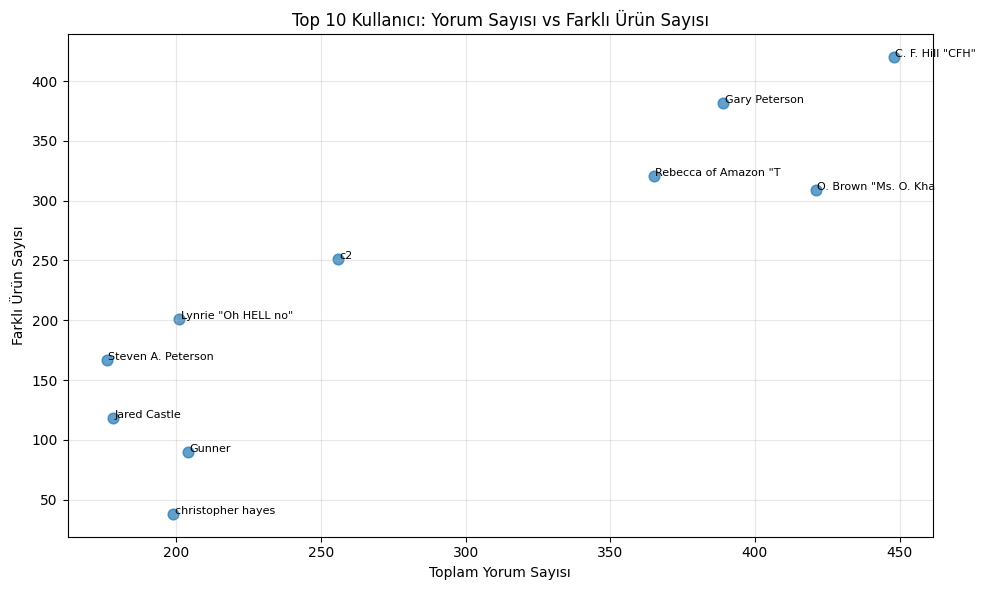

In [28]:
#  kullanƒ±cƒ±: yorum sayƒ±sƒ± vs farklƒ± √ºr√ºn sayƒ±sƒ± g√∂rselle≈ütirmesi

top_k = 10
top_users = user_loyalty.sort_values('review_count', ascending=False).head(top_k).copy()

plt.figure(figsize=(10,6))
plt.scatter(top_users['review_count'], top_users['distinct_products'], s=60, alpha=0.7)
for i, row in top_users.iterrows():
    label = f"{row['ProfileName'][:20] if pd.notna(row['ProfileName']) else row['UserId'][:12]}"
    plt.text(row['review_count']+0.5, row['distinct_products'], label, fontsize=8)
plt.xlabel('Toplam Yorum Sayƒ±sƒ±')
plt.ylabel('Farklƒ± √úr√ºn Sayƒ±sƒ±')
plt.title(f'Top {top_k} Kullanƒ±cƒ±: Yorum Sayƒ±sƒ± vs Farklƒ± √úr√ºn Sayƒ±sƒ±')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

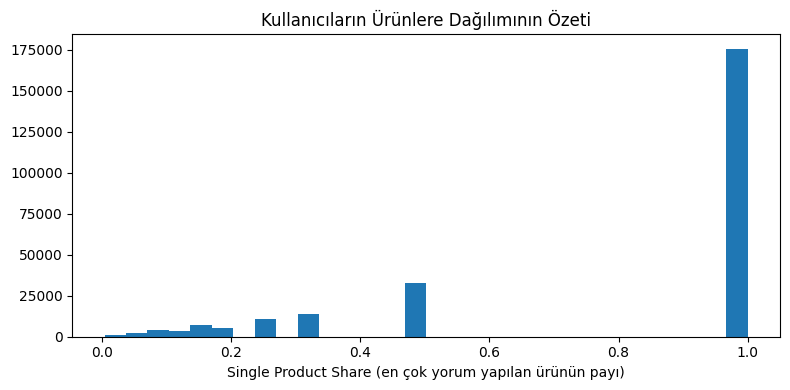

In [29]:
# kullanƒ±cƒ±larƒ±n √ºr√ºnlere daƒüƒ±lƒ±mƒ±nƒ±n √∂zeti g√∂rselle≈ütirmesi

plt.figure(figsize=(8,4))
plt.hist(user_loyalty['share_top_product'].dropna(), bins=30)
plt.xlabel('Single Product Share (en √ßok yorum yapƒ±lan √ºr√ºn√ºn payƒ±)')
plt.title('Kullanƒ±cƒ±larƒ±n √úr√ºnlere Daƒüƒ±lƒ±mƒ±nƒ±n √ñzeti')
plt.tight_layout()
plt.show()

In [30]:
# sadƒ±k kullanƒ±cƒ±larƒ± belirleme ve lineer regresyon i√ßin hazƒ±rlƒ±k

# Parametreler
min_reviews = 20        
top_n_users = 12        

# Hangi kullanƒ±cƒ±lar (en √ßok yorumu olan ve min_reviews >=)
candidate_users = user_loyalty[user_loyalty['review_count'] >= min_reviews].sort_values('review_count', ascending=False)
print(f"Sadƒ±k (>= {min_reviews} yorum) kullanƒ±cƒ± sayƒ±sƒ±: {len(candidate_users)}")

Sadƒ±k (>= 20 yorum) kullanƒ±cƒ± sayƒ±sƒ±: 1891


In [31]:
# kullanƒ±cƒ± puan tutarlƒ±lƒ±k analizi ve zaman i√ßinde trend hesaplama

consistency_rows = []
for uid in candidate_users['UserId'].head(200):  # performans i√ßin ilk 200'e alƒ±yoruz (gerektiƒüinde azalt)
    sub = df[df['UserId']==uid].set_index('date').sort_index()
    monthly = sub['Score'].resample('M').mean().dropna()
    if len(monthly) < 6:
        continue
    x = np.arange(len(monthly)).reshape(-1,1)  # zaman indeksini 0..n-1 yapƒ±yoruz
    y = monthly.values
    model = LinearRegression().fit(x,y)
    slope = float(model.coef_[0])   # birim: puan / ay-indeks
    std_score = float(y.std())
    avg_score = float(y.mean())
    consistency_rows.append({'UserId': uid, 'ProfileName': user_names.get(uid, ''), 'n_months': len(monthly),
                              'avg_score_monthly': avg_score, 'std_score_monthly': std_score, 'slope_per_month': slope,
                              'total_reviews': int(candidate_users.loc[candidate_users['UserId']==uid,'review_count'].iloc[0])})

consistency_df = pd.DataFrame(consistency_rows).sort_values('total_reviews', ascending=False)
consistency_df.to_csv('user_score_consistency.csv', index=False)
print("Sadƒ±k kullanƒ±cƒ±larƒ±n puan tutarlƒ±lƒ±ƒüƒ± (ilk 20):")
print(consistency_df.head(20))


Sadƒ±k kullanƒ±cƒ±larƒ±n puan tutarlƒ±lƒ±ƒüƒ± (ilk 20):
            UserId                                 ProfileName  n_months  \
0   A3OXHLG6DIBRW8                            C. F. Hill "CFH"        45   
1   A1YUL9PCJR3JTY             O. Brown "Ms. O. Khannah-Brown"        32   
2    AY12DBB0U420B                               Gary Peterson        35   
3   A281NPSIMI1C2R      Rebecca of Amazon "The Rebecca Review"        61   
4   A1Z54EM24Y40LL                                          c2        41   
5   A1TMAVN4CEM8U8                                      Gunner        15   
6   A2MUGFV2TDQ47K                         Lynrie "Oh HELL no"        35   
7   A3PJZ8TU8FDQ1K                                Jared Castle        33   
8    AQQLWCMRNDFGI                          Steven A. Peterson        41   
9   A2SZLNSI5KOQJT  Carrie, "Formerly &#34;Sister Carrie&#34;"        29   
10   AZV26LP92E6WU                   M. Hammond "ColemanFlGuy"        32   
12   AY1EF0GOH80EK              

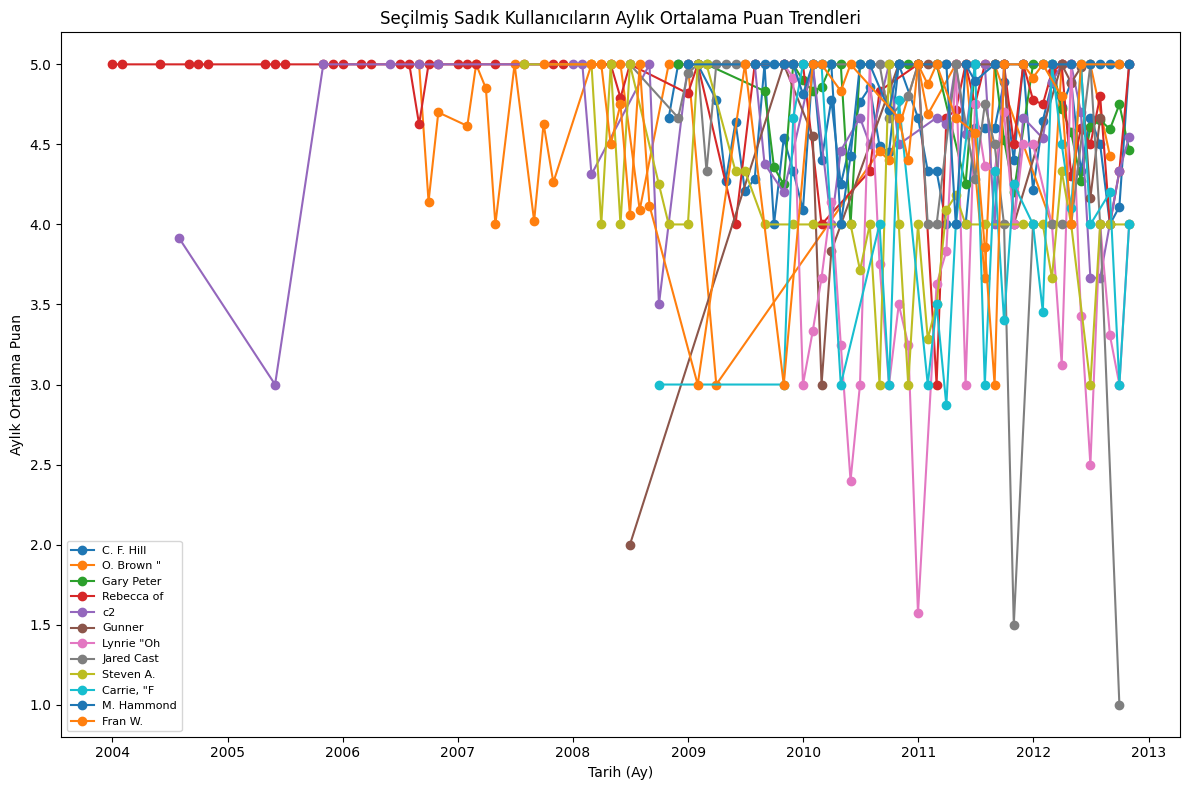

In [33]:
# se√ßilmi≈ü sadƒ±k kullanƒ±cƒ±larƒ±n aylƒ±k ortalama puan trendleri

plot_users = consistency_df.sort_values('total_reviews', ascending=False).head(top_n_users)['UserId'].tolist()
plt.figure(figsize=(12, 8))
for uid in plot_users:
    sub = df[df['UserId']==uid].set_index('date').sort_index()
    monthly = sub['Score'].resample('M').mean().dropna()
    if len(monthly) < 3: 
        continue
    plt.plot(monthly.index, monthly.values, marker='o', label=user_names.get(uid, uid)[:10])
plt.legend(loc='best', fontsize=8)
plt.xlabel('Tarih (Ay)')
plt.ylabel('Aylƒ±k Ortalama Puan')
plt.title('Se√ßilmi≈ü Sadƒ±k Kullanƒ±cƒ±larƒ±n Aylƒ±k Ortalama Puan Trendleri')
plt.tight_layout()
plt.show()


In [34]:
# kullanƒ±cƒ± puan trendlerinin √∂zet istatistikleri

neg = (consistency_df['slope_per_month'] < 0).sum()
pos = (consistency_df['slope_per_month'] > 0).sum()
print(f"Analize giren sadƒ±k kullanƒ±cƒ±lar: {len(consistency_df)} | Negatif slope: {neg} | Pozitif slope: {pos}")

Analize giren sadƒ±k kullanƒ±cƒ±lar: 185 | Negatif slope: 119 | Pozitif slope: 66


In [38]:
# kullanƒ±cƒ± profil isimlerini sƒ±nƒ±flandƒ±rma fonksiyonu

from scipy.stats import ttest_ind

def classify_profilename(name, userid=None):
   
    if pd.isna(name) or str(name).strip()=='':
        return 'missing'
        
    s = str(name).strip()
    if s.lower() in ['anonymous','anon','n/a','none','user','unknown']:
        return 'anonymous'
        
    if userid is not None and str(s).lower() == str(userid).lower():
        return 'userid_same'
   
    if ' ' in s and len(s) > 3:
        return 'real_name_like'
   
    if any(ch.isdigit() for ch in s) and ' ' not in s:
        return 'handle_like'
    
    if re.search(r'[\'\"]', s) or re.search(r'\.', s):
        return 'other'
    
    return 'real_name_like'

In [39]:
# profil isimlerini sƒ±nƒ±flandƒ±rma ve isimlendirme metrikleri olu≈üturma

df['profilename_class'] = df.apply(lambda r: classify_profilename(r['ProfileName'], r['UserId']), axis=1)
df['profilename_named_strict'] = df['profilename_class'].apply(lambda x: 'named' if x=='real_name_like' else 'anonymous')
df['profilename_named_loose'] = df['profilename_class'].apply(lambda x: 'named' if x in ['real_name_like','other'] else 'anonymous')

In [40]:
# strict isimlendirme kriterine g√∂re puan istatistikleri

grp_strict = df.groupby('profilename_named_strict')['Score'].agg(['count','mean','std']).reset_index()
print("ProfileName Strict Gruplama (count, mean, std):")
print(grp_strict)

ProfileName Strict Gruplama (count, mean, std):
  profilename_named_strict   count      mean       std
0                anonymous   25781  4.175284  1.343098
1                    named  542673  4.183575  1.308864


In [41]:
# isimli ve anonim kullanƒ±cƒ±larƒ±n puanlarƒ± arasƒ±ndaki istatistiksel fark testi

scores_named = df[df['profilename_named_strict']=='named']['Score'].dropna()
scores_anon = df[df['profilename_named_strict']=='anonymous']['Score'].dropna()
tstat, pval = ttest_ind(scores_named, scores_anon, equal_var=False)
print(f"Strict t-test: t={tstat:.3f}, p={pval:.3e}")

Strict t-test: t=0.969, p=3.323e-01


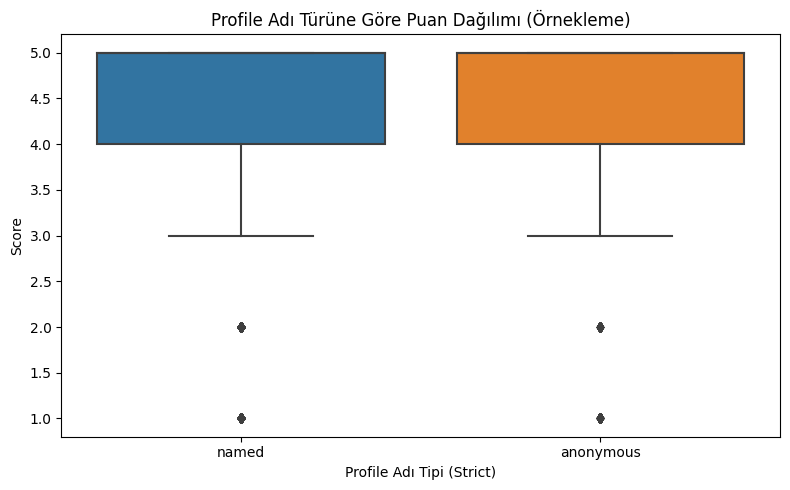

In [43]:
# profile Adƒ± t√ºr√ºne g√∂re puan daƒüƒ±lƒ±mƒ±

plt.figure(figsize=(8,5))
import seaborn as sns
sns.boxplot(x='profilename_named_strict', y='Score', data=df.sample(min(len(df), 20000), random_state=42))  # √∂rnekleme ile hƒ±zlandƒ±r
plt.xlabel('Profile Adƒ± Tipi (Strict)')
plt.ylabel('Score')
plt.title('Profile Adƒ± T√ºr√ºne G√∂re Puan Daƒüƒ±lƒ±mƒ± (√ñrnekleme)')
plt.tight_layout()
plt.show()

In [44]:
# loose isimlendirme kriterine g√∂re puan istatistikleri ve T-Test

grp_loose = df.groupby('profilename_named_loose')['Score'].agg(['count','mean','std']).reset_index()
print("ProfileName Loose Gruplama (count, mean, std):")
print(grp_loose)
scores_named_l = df[df['profilename_named_loose']=='named']['Score'].dropna()
scores_anon_l = df[df['profilename_named_loose']=='anonymous']['Score'].dropna()
tstat_l, pval_l = ttest_ind(scores_named_l, scores_anon_l, equal_var=False)
print(f"Loose t-test: t={tstat_l:.3f}, p={pval_l:.3e}")

ProfileName Loose Gruplama (count, mean, std):
  profilename_named_loose   count      mean       std
0               anonymous   22906  4.173230  1.345534
1                   named  545548  4.183617  1.308941
Loose t-test: t=1.146, p=2.519e-01


In [45]:
# yorum uzunluklarƒ±nƒ± hesaplama ve istatistiksel √∂zet

df['word_count'] = df['Text'].apply(lambda x: len(str(x).split()))

# Ortalama, medyan, min, max kontrol√º
print(df['word_count'].describe())

count    568454.000000
mean         80.264023
std          79.455384
min           3.000000
25%          33.000000
50%          56.000000
75%          98.000000
max        3432.000000
Name: word_count, dtype: float64


In [47]:
# Yorum Uzunluƒüuna G√∂re Kategorize Etme ve Puan Ortalamalarƒ±nƒ± Kar≈üƒ±la≈ütƒ±rma

threshold = 500

# Yeni s√ºtun: yorum tipi
df['comment_length_type'] = df['word_count'].apply(lambda x: 'Uzun' if x > threshold else 'Kƒ±sa')

# Her kategorideki ortalama puanƒ± hesapla
avg_scores = df.groupby('comment_length_type')['Score'].mean().reset_index()
print(avg_scores)

  comment_length_type     Score
0                Kƒ±sa  4.184795
1                Uzun  3.836531


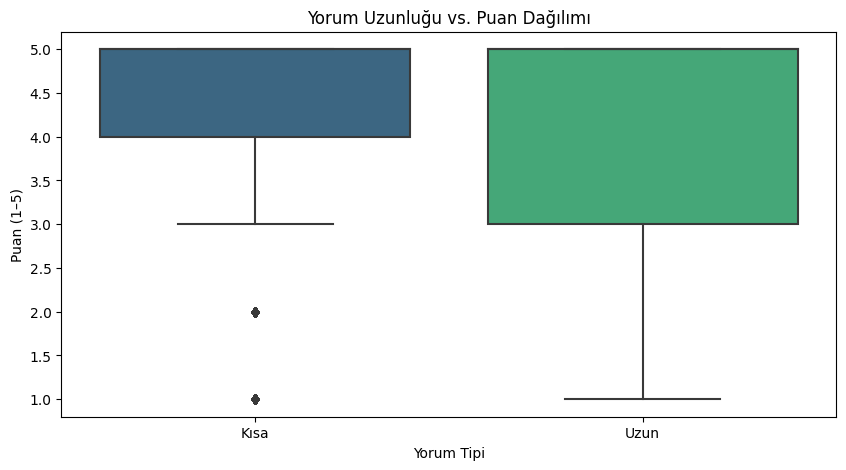

In [48]:
# Yorum Uzunluƒüu vs. Puan Daƒüƒ±lƒ±mƒ± G√∂rselle≈ütirmesi

plt.figure(figsize=(10, 5))
sns.boxplot(x='comment_length_type', y='Score', data=df, palette='viridis')
plt.title('Yorum Uzunluƒüu vs. Puan Daƒüƒ±lƒ±mƒ±')
plt.xlabel('Yorum Tipi')
plt.ylabel('Puan (1‚Äì5)')
plt.show()


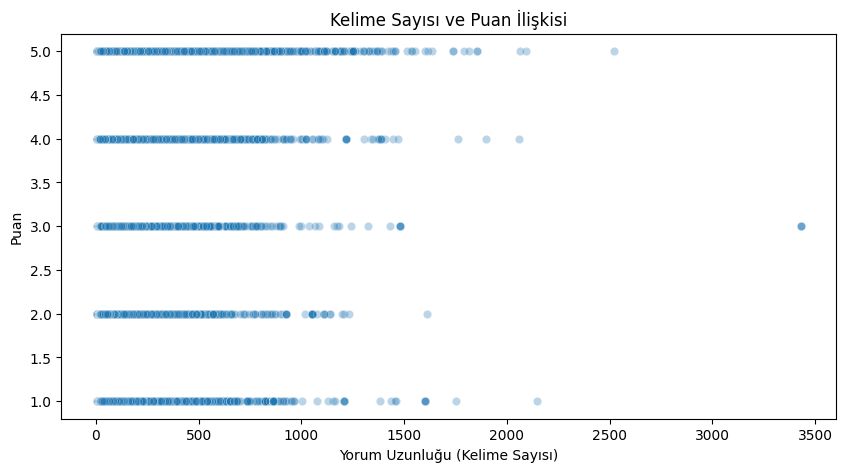

In [49]:
# Kelime Sayƒ±sƒ± ve Puan ƒ∞li≈ükisi

plt.figure(figsize=(10, 5))
sns.scatterplot(x='word_count', y='Score', data=df, alpha=0.3)
plt.title('Kelime Sayƒ±sƒ± ve Puan ƒ∞li≈ükisi')
plt.xlabel('Yorum Uzunluƒüu (Kelime Sayƒ±sƒ±)')
plt.ylabel('Puan')
plt.show()


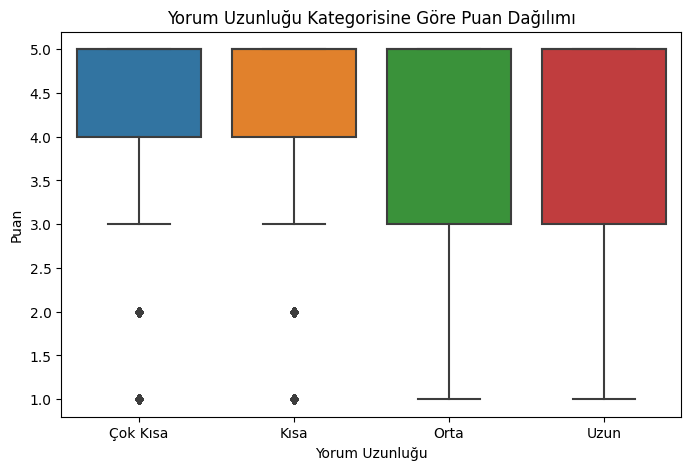

In [50]:
# Yorum Uzunluƒüu Kategorisine G√∂re Puan Daƒüƒ±lƒ±mƒ±

def classify_length(x):
    if x < 50:
        return '√áok Kƒ±sa'
    elif x < 150:
        return 'Kƒ±sa'
    elif x < 300:
        return 'Orta'
    else:
        return 'Uzun'

df['length_category'] = df['word_count'].apply(classify_length)

plt.figure(figsize=(8, 5))
sns.boxplot(x='length_category', y='Score', data=df, order=['√áok Kƒ±sa', 'Kƒ±sa', 'Orta', 'Uzun'])
plt.title('Yorum Uzunluƒüu Kategorisine G√∂re Puan Daƒüƒ±lƒ±mƒ±')
plt.xlabel('Yorum Uzunluƒüu')
plt.ylabel('Puan')
plt.show()


In [51]:
avg_scores = df.groupby('comment_length_type')['Score'].mean().reset_index()
print(avg_scores)


  comment_length_type     Score
0                Kƒ±sa  4.184795
1                Uzun  3.836531


In [52]:
df.groupby('comment_length_type')['Score'].mean()


comment_length_type
Kƒ±sa    4.184795
Uzun    3.836531
Name: Score, dtype: float64

In [53]:
df.groupby('length_category')['Score'].mean()


length_category
Kƒ±sa        4.101991
Orta        4.004454
Uzun        3.956789
√áok Kƒ±sa    4.316177
Name: Score, dtype: float64

In [54]:
# Gerekli k√ºt√ºphaneler
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [55]:
# Summary sentiment
df['summary_sentiment'] = df['Summary'].astype(str).apply(lambda x: sid.polarity_scores(x)['compound'])

# Text sentiment
df['text_sentiment'] = df['Text'].astype(str).apply(lambda x: sid.polarity_scores(x)['compound'])

# √ñrnek kontrol
df[['Summary', 'summary_sentiment', 'Text', 'text_sentiment']].head()


Summary  summary_sentiment  \
0  Good Quality Dog Food             0.4404   
1      Not as Advertised             0.0000   
2  "Delight" says it all             0.0000   
3         Cough Medicine             0.0000   
4            Great taffy             0.6249   

                                                Text  text_sentiment  
0  I have bought several of the Vitality canned d...          0.9441  
1  Product arrived labeled as Jumbo Salted Peanut...         -0.5664  
2  This is a confection that has been around a fe...          0.8265  
3  If you are looking for the secret ingredient i...          0.0000  
4  Great taffy at a great price.  There was a wid...          0.9468

In [56]:
# Fark s√ºtunu
df['sentiment_diff'] = df['summary_sentiment'] - df['text_sentiment']

# √ñrnek: Farkƒ± en b√ºy√ºk olan 5 yorum
df.sort_values('sentiment_diff', ascending=False)[['Summary', 'Text', 'summary_sentiment', 'text_sentiment', 'sentiment_diff']].head()


Summary  \
470258  Very good Raw natural almonds at a GREAT price!   
460407       Like Water, But Better! Love At First Sip!   
431877              Love Love Love this diaper ointment   
126438      Do Not Purchase. HORRIBLE HORRIBLE HORRIBLE   
79389        LOVE LOVE LOVE the Almond Cashew with Flax   

                                                     Text  summary_sentiment  \
470258  Almonds are very healthful! (Eat a handful eve...             0.9018   
460407  First of all, I'm the type of person who wants...             0.9183   
431877  I bought this ointment at a friends recommenda...             0.9274   
126438  I've been using various truffle oils for the l...             0.8800   
79389   HATE HATE HATE the gooey mess I was just sent ...             0.9501   

        text_sentiment  sentiment_diff  
470258         -0.9877          1.8895  
460407         -0.9631          1.8814  
431877         -0.9416          1.8690  
126438         -0.9755          1.8555  
79389          -0.8957          1.8458

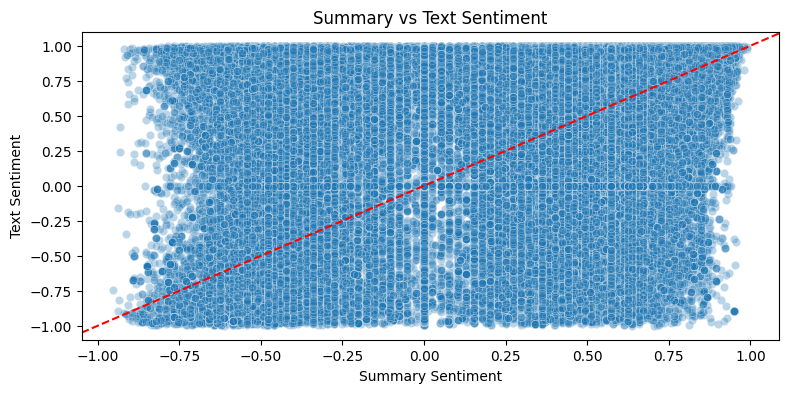

In [61]:
# Summary vs Text Sentiment G√∂rselle≈ütirmesi

plt.figure(figsize=(9, 4))
sns.scatterplot(x='summary_sentiment', y='text_sentiment', data=df, alpha=0.3)
plt.axline((0, 0), slope=1, color='red', linestyle='--')  # y=x √ßizgisi
plt.xlabel('Summary Sentiment')
plt.ylabel('Text Sentiment')
plt.title('Summary vs Text Sentiment')
plt.show()


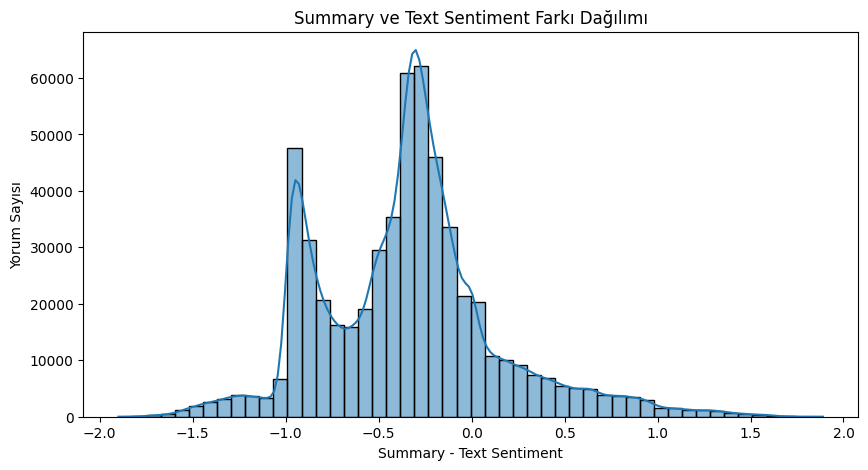

In [63]:
# Summary ve Text Sentiment Farkƒ± Daƒüƒ±lƒ±mƒ± G√∂rselle≈ütirmesi

plt.figure(figsize=(10,5))
sns.histplot(df['sentiment_diff'], bins=50, kde=True)
plt.title('Summary ve Text Sentiment Farkƒ± Daƒüƒ±lƒ±mƒ±')
plt.xlabel('Summary - Text Sentiment')
plt.ylabel('Yorum Sayƒ±sƒ±')
plt.show()


In [64]:
# √ñzet pozitif (>0.3) ve metin negatif (<-0.3) yorumlar
summary_pos_text_neg = df[(df['summary_sentiment'] > 0.3) & (df['text_sentiment'] < -0.3)]

# En √ºst 5 √∂rnek
summary_pos_text_neg[['Summary', 'Text', 'Score', 'summary_sentiment', 'text_sentiment']].head()


Summary  \
11   My cats LOVE this "diet" food better than thei...   
53                                      not ass kickin   
121                   Perfect Cat Food For Older Cats!   
138                                   Simply the BEST!   
156                                         Great Deal   

                                                  Text  Score  \
11   One of my boys needed to lose some weight and ...      5   
53   we're used to spicy foods down here in south t...      3   
121  This cat food was recommended by my vet becaus...      5   
138  I keep trying other brands.... cheaper brands....      5   
156  What a deal this is the healthiest salt you ca...      5   

     summary_sentiment  text_sentiment  
11              0.8331         -0.7579  
53              0.4310         -0.3612  
121             0.6114         -0.3626  
138             0.7371         -0.4199  
156             0.6249         -0.7269

In [65]:
# √ñzet negatif (<-0.3) ve metin pozitif (>0.3) yorumlar
summary_neg_text_pos = df[(df['summary_sentiment'] < -0.3) & (df['text_sentiment'] > 0.3)]

# En √ºst 5 √∂rnek
summary_neg_text_pos[['Summary', 'Text', 'Score', 'summary_sentiment', 'text_sentiment']].head()


Summary  \
16                                  poor taste   
57                       How can you go wrong!   
73        Warning!  WARNING!  -ALCOHOL SUGARS!   
106                              disappointing   
107  Wasting Vinegar on a Cucumber is a Shame!   

                                                  Text  Score  \
16   I love eating them and they are good for watch...      2   
57   It is chocolate, what can I say.  Great variet...      5   
73   Buyer Beware Please! This sweetener is not for...      1   
106  not what I was expecting in terms of the compa...      3   
107  I first bought pickled asparagus at an Amish m...      5   

     summary_sentiment  text_sentiment  
16             -0.4767          0.7481  
57             -0.5255          0.9100  
73             -0.7513          0.9665  
106            -0.4939          0.5719  
107            -0.7263          0.9503

In [66]:
# Tutarsƒ±zlƒ±k skoru = √∂zet ve metin arasƒ±ndaki farkƒ±n mutlak deƒüeri
df['inconsistency_score'] = abs(df['sentiment_diff'])

# Tutarsƒ±z yorumlarƒ± en y√ºksekten sƒ±ralamak
df.sort_values('inconsistency_score', ascending=False)[['Summary', 'Text', 'Score', 'inconsistency_score']].head(10)


Summary  \
441875                      AWFUL- AWFUL- NASTY- HORRIBLE   
470258    Very good Raw natural almonds at a GREAT price!   
460407         Like Water, But Better! Love At First Sip!   
51452   Ugh! Horrible tasting coffee. Worst French Roa...   
95124   Oversweet Disappointment.  Not dark at all.  :...   
431877                Love Love Love this diaper ointment   
126438        Do Not Purchase. HORRIBLE HORRIBLE HORRIBLE   
293601                      Terrible! Terrible! Terrible!   
472150                          KILL! KILL!! KILL!!!!!!!!   
242586                      Bad Smell + Bad Taste = AWFUL   

                                                     Text  Score  \
441875  Do your research on this... the main ingredien...      1   
470258  Almonds are very healthful! (Eat a handful eve...      5   
460407  First of all, I'm the type of person who wants...      5   
51452   What am I gonna do with four pounds (less a ha...      1   
95124   These sounded divine.  I ADORE dark chocolate,...      3   
431877  I bought this ointment at a friends recommenda...      5   
126438  I've been using various truffle oils for the l...      1   
293601  These Wine Gums are a travesty, whose only vag...      1   
472150  I was very, very skeptical that this stuff wou...      4   
242586  I wasn't expecting anything spectacular, but t...      1   

        inconsistency_score  
441875               1.8998  
470258               1.8895  
460407               1.8814  
51452                1.8804  
95124                1.8771  
431877               1.8690  
126438               1.8555  
293601               1.8494  
472150               1.8472  
242586               1.8470

In [68]:
df['Time'] = pd.to_datetime(df['Time'], unit='s')

In [74]:
# Se√ßili √úr√ºnlerin Kar≈üƒ±la≈ütƒ±rmalƒ± Analizi: Puan, Yararlƒ±lƒ±k ve Yorum Uzunluƒüu

df['helpfulness_ratio'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator'].replace(0, 1)
df['word_count'] = df['Text'].apply(lambda x: len(str(x).split()))
products_to_compare = ['B000LQOCH0', 'B004I613EE', 'B001E4KFG0']
compare_df = df[df['ProductId'].isin(products_to_compare)]

# √úr√ºn bazlƒ± √∂zet tablo
product_stats = compare_df.groupby('ProductId').agg(
    avg_score=('Score','mean'),
    avg_helpfulness=('helpfulness_ratio','mean'),
    avg_word_count=('word_count','mean'),
    review_count=('Id','count')
).reset_index()

print(product_stats)


    ProductId  avg_score  avg_helpfulness  avg_word_count  review_count
0  B000LQOCH0        4.0              1.0            94.0             1
1  B001E4KFG0        5.0              1.0            48.0             1
2  B004I613EE        5.0              1.0            50.5             2


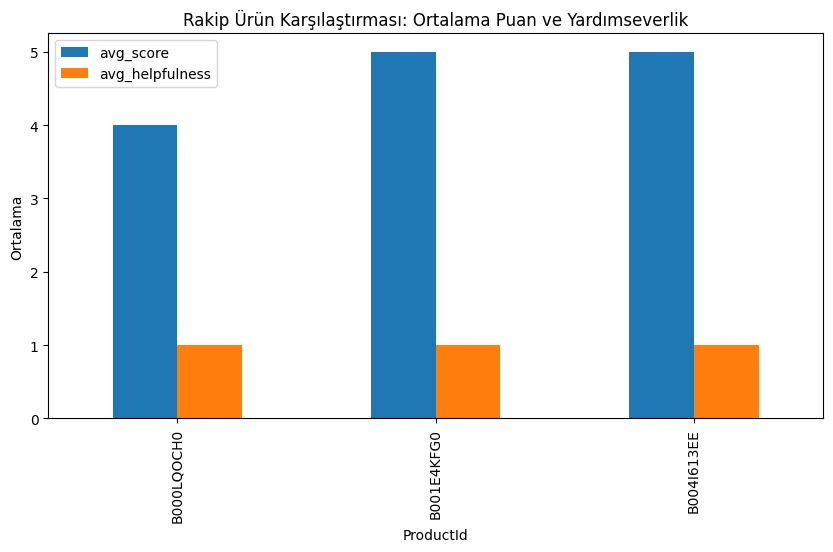

In [75]:
# Rakip √úr√ºn Kar≈üƒ±la≈ütƒ±rmasƒ±: Ortalama Puan ve Yardƒ±mseverlik G√∂rselle≈ütirmesi

product_stats.set_index('ProductId')[['avg_score','avg_helpfulness']].plot(kind='bar', figsize=(10,5))
plt.title('Rakip √úr√ºn Kar≈üƒ±la≈ütƒ±rmasƒ±: Ortalama Puan ve Yardƒ±mseverlik')
plt.ylabel('Ortalama')
plt.show()


In [82]:
# Olumsuz Yorumlarda En Sƒ±k Kullanƒ±lan Kelime ve Kelime √áiftlerini Analiz Etme

neg_reviews = df[df['Score'] <= 2]['Text'].astype(str)

# √ñzel stopword listesi
custom_stopwords = list(text.ENGLISH_STOP_WORDS.union([
    'br','like','just','don','really','time','tried','bought',
    'amazon','product','food','good','tea','coffee','box','dog'
]))

# CountVectorizer: unigram + bigram
vectorizer = CountVectorizer(stop_words=custom_stopwords, ngram_range=(1,2), min_df=20)

X = vectorizer.fit_transform(neg_reviews.astype(str))  # neg_reviews = 1-2 yƒ±ldƒ±zlƒ± yorumlar
words = vectorizer.get_feature_names_out()
word_counts = X.sum(axis=0).A1

freq_df = pd.DataFrame({'word': words, 'count': word_counts}).sort_values('count', ascending=False)
print(freq_df.head(20))

          word  count
17887    taste  32120
7152    flavor  20543
2592       buy  15040
5137       did  11136
6125       eat  10751
1293       bad  10593
1838    better  10355
19157      try  10246
19776       ve  10140
1390       bag   9882
20181    water   9780
8105       got   9598
10489   little   9167
11045     make   9065
18663  thought   9015
5219      didn   8960
9955      know   8931
10831     love   8929
8254     great   8905
20260      way   8758


In [83]:
# √ñrnek konu ba≈ülƒ±klarƒ±
topics = {
    'Paketleme Sorunu': ['package','broken','damaged','box','wrapped'],
    'Tazelik / Son Kullanma': ['expired','stale','old','spoiled'],
    'Yanlƒ±≈ü / Eksik √úr√ºn': ['wrong','missing','incorrect','substitute'],
    'Tat / Lezzet Sorunu': ['taste','flavor','bad','bland','bitter'],
    'Teslimat / Kargo': ['delivery','late','shipping','slow']
}

# Her konu ba≈ülƒ±ƒüƒ± i√ßin frekans sayƒ±sƒ±
topic_counts = {}
for topic, keywords in topics.items():
    topic_counts[topic] = freq_df[freq_df['word'].isin(keywords)]['count'].sum()

topic_counts_df = pd.DataFrame(list(topic_counts.items()), columns=['Topic','Count']).sort_values('Count', ascending=False)
print(topic_counts_df)


                    Topic  Count
3     Tat / Lezzet Sorunu  68544
1  Tazelik / Son Kullanma  10732
0        Paketleme Sorunu   8908
4        Teslimat / Kargo   5219
2     Yanlƒ±≈ü / Eksik √úr√ºn   4055


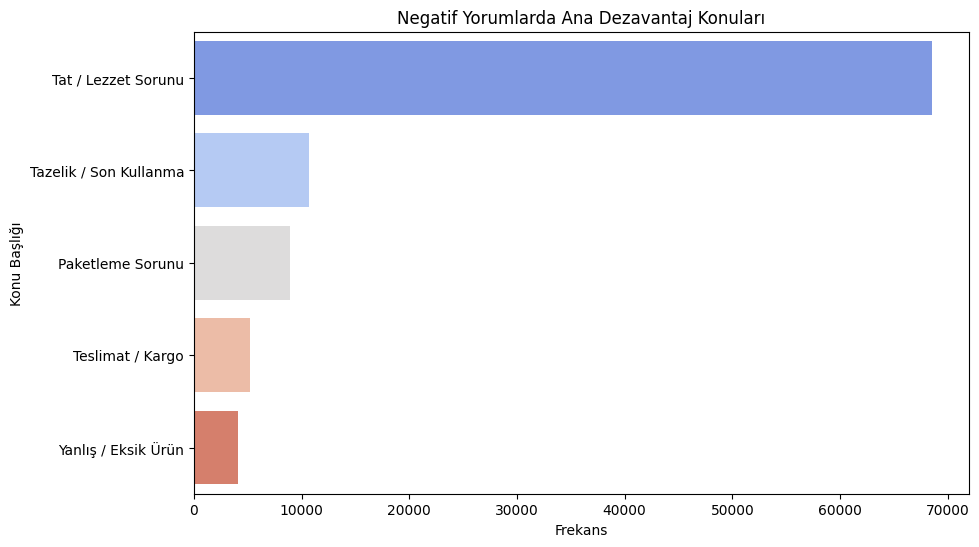

In [84]:
# Negatif Yorumlarda Ana Dezavantaj Konularƒ± G√∂rselle≈ütirmesi

plt.figure(figsize=(10,6))
sns.barplot(x='Count', y='Topic', data=topic_counts_df, palette='coolwarm')
plt.title('Negatif Yorumlarda Ana Dezavantaj Konularƒ±')
plt.xlabel('Frekans')
plt.ylabel('Konu Ba≈ülƒ±ƒüƒ±')
plt.show()


In [ ]:
# 5 yƒ±ldƒ±zlƒ± yorumlar
reviews_5 = df[df['Score'] == 5]['Text'].astype(str)

# 1-2 yƒ±ldƒ±zlƒ± yorumlar
reviews_1_2 = df[df['Score'] <= 2]['Text'].astype(str)


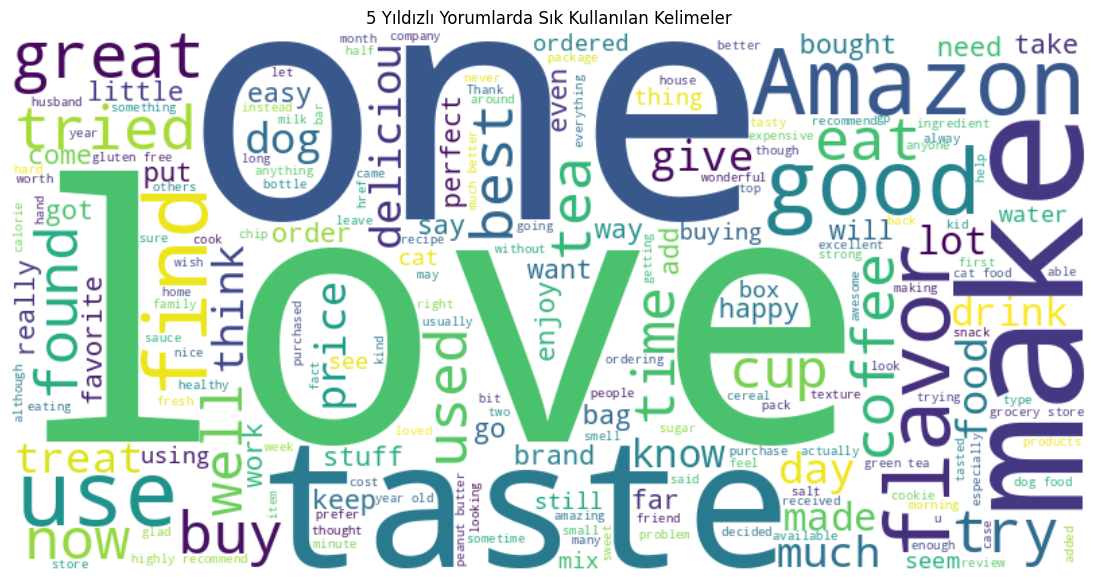

In [ ]:
# WorldCloud G√∂rselle≈ütirmesi

# √ñzel stopwords listesi: WordCloud'un kendi stopwords + anlamsƒ±z kelimeler
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['br', 'like', 'product'])  # ƒ∞stenmeyen kelimeleri ekle

# 5 yƒ±ldƒ±zlƒ± yorumlar
wordcloud_5 = WordCloud(
    width=800, height=400, background_color='white',
    stopwords=custom_stopwords
).generate(' '.join(reviews_5))

plt.figure(figsize=(15,7))
plt.imshow(wordcloud_5, interpolation='bilinear')
plt.axis('off')
plt.title('5 Yƒ±ldƒ±zlƒ± Yorumlarda Sƒ±k Kullanƒ±lan Kelimeler')
plt.show()

# 1-2 yƒ±ldƒ±zlƒ± yorumlar
wordcloud_1_2 = WordCloud(
    width=800, height=400, background_color='white',
    stopwords=custom_stopwords
).generate(' '.join(reviews_1_2))

plt.figure(figsize=(15,7))
plt.imshow(wordcloud_1_2, interpolation='bilinear')
plt.axis('off')
plt.title('1-2 Yƒ±ldƒ±zlƒ± Yorumlarda Sƒ±k Kullanƒ±lan Kelimeler')
plt.show()